# Plot routines #


This notebook provides a number of plot functions. For each data quality assessment, a plot routine is provided

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

### Data model ###

In [168]:
def dq_data_model_bar_plot(xls_fn):
    """
    Reads in an excel file with data model quality results
    A graph for each sheet is prepared 
    """
    def fn_template(fn, suffix='_{:s}', extension='.png'):
        """
        Strips a file name from its extension and provides a template for making a set of files
        """
        return str(os.path.splitext(fn) + suffix + extension).format
        
#     def plot_dm_dq(ax, df, col):
#         artists = ax.pie(df[col], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
#         ax.set(ylabel='', title=col, aspect='equal')
#         return artists
    
    def plot_dm_dq(ax, df, title, set_xlabels):
        colors = ['g', 'y', 'orange', 'r']
        width = 0.35
        names = df.keys()[1:]
        index = np.arange(len(names))
#         plt.figure(figsize=(len(index)/4.,8))
#         some_nums = [[5., 10., 19.], [1., 3., 5.], [1., 3., 5.], [10., 2., 6.]]
        bottom = np.zeros(len(index))
        artists = []
        for n, col in zip(df.iterrows(), colors):
            count = np.array(n[1:][0][1:], dtype='int')  # get the numbers of features in an array
            artist = ax.bar(index, count, width, bottom=bottom, color=col, linewidth=0)
#             import pdb
#             pdb.set_trace()
            artists.append(artist[0])
            bottom += np.atleast_1d(count)

        ax.set_xticks(np.atleast_1d(index) + width/2.)
        if set_xlabels:
            ax.set_xticklabels(tuple(names), rotation='vertical')
        else:
            ax.set_xticklabels('')
        # ax.set_ylim([0., ])
        ax.set(ylabel='', title=title)
        return artists
    
    xls = pd.ExcelFile(xls_fn)
    nplots = len(xls.sheet_names)
    nrows = int(np.round(np.sqrt(nplots)))
    ncols = int(np.ceil(float(nplots)/nrows))
    fig = plt.figure(figsize=(16,8))
    
    plt.subplots_adjust(bottom=0.2, hspace=0.25)
    for n, name in enumerate(xls.sheet_names):  # [0:1]
        df = xls.parse(name)
        ax = plt.subplot(nrows, ncols, n + 1)
        if n >= nplots-ncols:
            set_xlabels=True
        else:
            set_xlabels=False
#         , axes = plt.subplots(figsize=(16,8), nrows=nrows, ncols=ncols)
#         for ax, col in zip(axes.flat, df.columns[1:]):
#         for n, col in enumerate(df.columns[1:]):
        artists = plot_dm_dq(ax, df, name, set_xlabels)
#     import pdb
#     pdb.set_trace()
    fig.legend(artists, df['validation'], loc='upper center', bbox_to_anchor=(0.4, 0.05),
              fancybox=True, shadow=True, ncol=4)
            
#     return fig    
        
#     # first load the data
    
#     png_template = fn_template(xls_fn)
#     plt.savefig(png_template(name), dpi=150, bbox_inches='tight')
#     for ax, col in zip(axes.flat, df.columns[1:]):
#         plot_dm_dq(ax, df, col)
#     import pdb
#     pdb.set_trace()
#     return fig


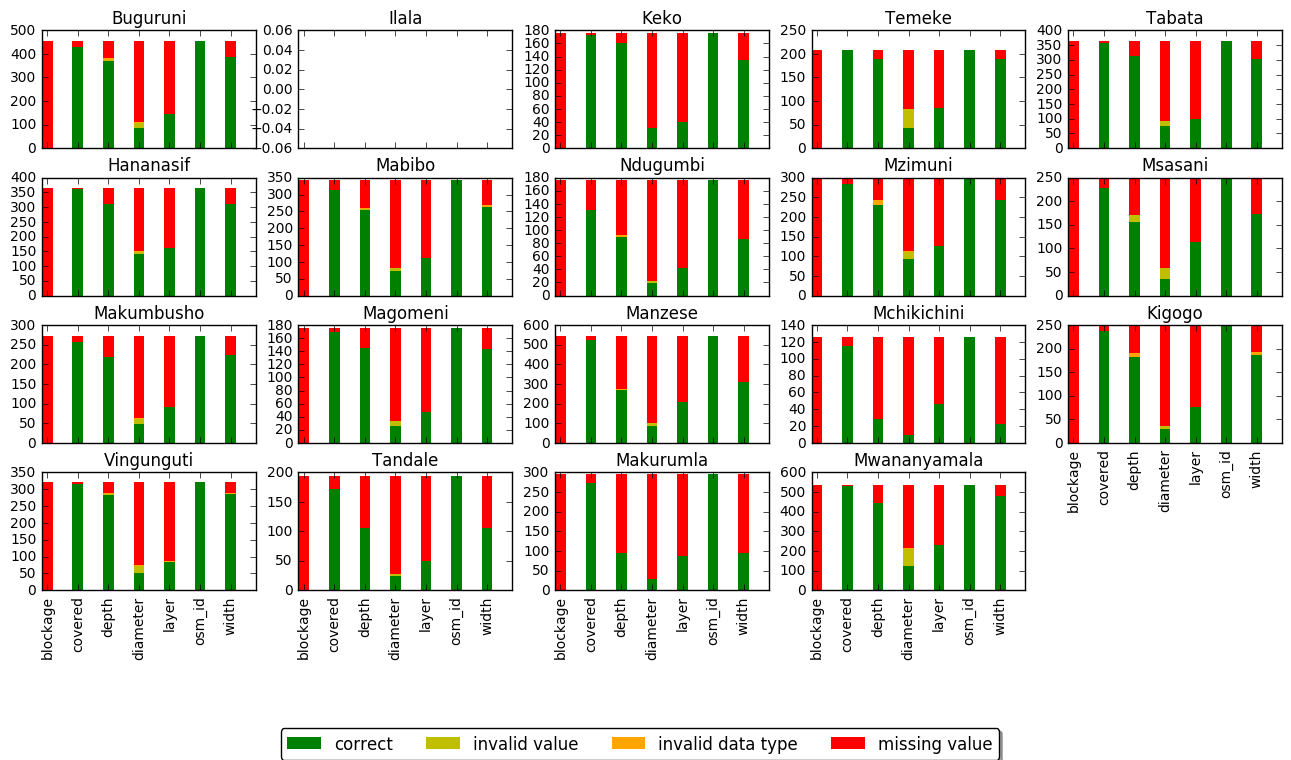

In [169]:
xls_fn = r'c:\test\report_files\data_model_channels_report.xlsx'

dq_data_model_bar_plot(xls_fn)


In [164]:
xls = pd.ExcelFile(xls_fn)
df = xls.parse('Buguruni')
df['validation']

0              correct
1        invalid value
2    invalid data type
3        missing value
Name: validation, dtype: object

In [117]:
for n in df.iterrows():
    print n[1:][0][1:]


blockage      0
covered     431
depth       371
diameter     84
layer       144
osm_id      454
width       388
Name: 0, dtype: object
blockage     0
covered      0
depth        2
diameter    25
layer        0
osm_id       0
width        0
Name: 1, dtype: object
blockage    0
covered     0
depth       8
diameter    3
layer       0
osm_id      0
width       0
Name: 2, dtype: object
blockage    454
covered      23
depth        73
diameter    342
layer       310
osm_id        0
width        66
Name: 3, dtype: object


In [46]:

nplots = 10
nrows = int(np.round(np.sqrt(nplots)))
ncols = int(np.ceil(float(nplots)/nrows))
print nrows, ncols


3 4


[<matplotlib.text.Text at 0x118cfa58>, <matplotlib.text.Text at 0x127c19e8>]

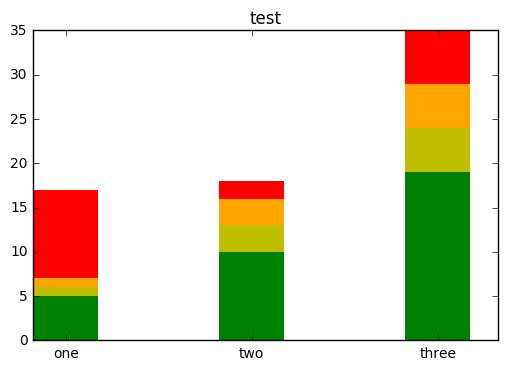

In [101]:
colors = ['g', 'y', 'orange', 'r']
ax = plt.subplot()
index = [0., 1., 2.]
width = 0.35
names = ['one', 'two', 'three']
plt.figure(figsize=(len(index)/4.,8))
some_nums = [[5., 10., 19.], [1., 3., 5.], [1., 3., 5.], [10., 2., 6.]]
bottom = np.zeros(len(index))
for num, col in zip(some_nums, colors):
    artists = ax.bar(index, num, width, bottom=bottom, color=col, linewidth=0)
    bottom += np.atleast_1d(num)

ax.set_xticks(np.atleast_1d(index) + width/2.)
ax.set_xticklabels(tuple(names))
# ax.set_ylim([0., ])

ax.set(ylabel='', title='test')
# ax.set_xticklabels
# artists = ax.pie(some_nums, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
# ?ax.bar() #some_nums)
# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# ?ax.barbs
# return artists


In [93]:
?ax.set_xticklabels

In [99]:
?ax.bar